# Ratings and Revenue

Is there a noticeable relationship between ratings and the top film gross revenue?

note: to create the movie.db locally, run the notebook SQLiteDatabase.ipynb

## import the data

In [1]:
#necessary imports

import sqlite3
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from glob import glob


#add pandas display options for number and column display
pd.options.display.float_format = '{:.2f}'.format
pd.set_option('display.max_columns', None)

In [3]:
#converts tsv files

tsv_file = './zippedData/rt.movie_info.tsv.gz'
convert = pd.read_table(tsv_file, delimiter='\t')
convert.to_csv('./zippedData/rt.movie_info.csv.gz')

tsv_file_r = './zippedData/rt.reviews.tsv.gz'
convert_r = pd.read_table(tsv_file_r, delimiter='\t', encoding = 'unicode_escape')
convert_r.to_csv('./zippedData/rt.reviews.csv.gz')

In [4]:
#importing data using glob

datafiles = glob("./zippedData/*.csv.gz")
datafiles

['./zippedData/rt.reviews.csv.gz',
 './zippedData/imdb.title.crew.csv.gz',
 './zippedData/rt.movie_info.csv.gz',
 './zippedData/tmdb.movies.csv.gz',
 './zippedData/imdb.title.akas.csv.gz',
 './zippedData/imdb.name.basics.csv.gz',
 './zippedData/imdb.title.basics.csv.gz',
 './zippedData/tn.movie_budgets.csv.gz',
 './zippedData/bom.movie_gross.csv.gz',
 './zippedData/imdb.title.principals.csv.gz']

In [5]:
datafiles_dict = {}
for filename in datafiles:
    filename_cleaned = os.path.basename(filename).replace(".csv", "").replace(".gz", "").replace(".", "_") # cleaning the filenames
    filename_df = pd.read_csv(filename)
    datafiles_dict[filename_cleaned] = filename_df

In [6]:
print(datafiles_dict.keys())

dict_keys(['rt_reviews', 'imdb_title_crew', 'rt_movie_info', 'tmdb_movies', 'imdb_title_akas', 'imdb_name_basics', 'imdb_title_basics', 'tn_movie_budgets', 'bom_movie_gross', 'imdb_title_principals'])


In [7]:
#load in dataset in csv to dataframe

tmdb_mglb_df = pd.read_csv('./zippedData/tmdb_mglb.csv')

## Ratings

Review user-generated review/rating aka Audience Score

### Of the films with the top 5 box office revenue, how were the ratings?

In [68]:
conn = sqlite3.connect('movie.db') 
cur = conn.cursor()

cur.execute(""" 
SELECT rating, box_office
FROM rt_reviews
JOIN rt_movie_info
USING('pid')  
ORDER BY box_office DESC;""")

pd.set_option('display.max_columns', None)
dft = pd.DataFrame(cur.fetchall())
dft.columns = (x[0] for x in cur.description)
#print(dft.shape)
#print(dft.info())
dft.head()

,rating,box_office
0,3/4,368000000.0
1,2.5/5,303001229.0
2,7,299300000.0
3,3.5/4,279167575.0
4,B-,261835892.0


**Finding**: We can see that there is not a trend in ratings within the top 5 films having the highest box office revenue.

### Is there a common genre associated with top ratings?

In [5]:
conn = sqlite3.connect('movie.db') 
cur = conn.cursor()

cur.execute(""" 
SELECT r.rating, box_office, genre_action as Action, genre_kids as Kids, 
genre_adventure as Adventure, genre_animation as Animation, genre_classics as Classics, 
genre_comedy as Comedy, genre_documentary as Documentary, genre_drama as Drama, 
genre_horror as Horror, genre_international as International, genre_kids as Kids, 
genre_muscial as Musical, genre_mystery as Mystery, genre_scifi as SciFi, 
genre_spirituality as Spirituality, genre_sports as Sports, genre_romance as Romance,
genre_television as Television, genre_western as Western
FROM rt_reviews r
LEFT JOIN rt_movie_info
USING('id')  
WHERE (box_office > 100000) & (r.rating == '4/4') OR (box_office > 100000) & 
(r.rating == 'A') OR (box_office > 100000) & (r.rating == '10') OR 
(box_office > 100000) & (r.rating == '5/5') 
GROUP BY id
ORDER BY box_office DESC;""")

pd.set_option('display.max_columns', None)
dfratetoprofit = pd.DataFrame(cur.fetchall())
dfratetoprofit.columns = (x[0] for x in cur.description)
#print(dft.shape)
#print(dft.info())
dfratetoprofit

,rating,box_office,Action,Kids,Adventure,Animation,Classics,Comedy,Documentary,Drama,Horror,International,Kids,Musical,Mystery,SciFi,Spirituality,Sports,Romance,Television,Western
0,5/5,368000000.00,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,4/4,303001229.00,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,5/5,299300000.00,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,5/5,261835892.00,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
4,4/4,241250669.00,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143,4/4,200000.00,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
144,4/4,140901.00,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0
145,4/4,116783.00,1,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0
146,4/4,109257.00,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0


**Finding**: Films with the highest ratings and highest box office revenue are primarily distributed within the action, adventure, comedy and drama genres. 

We found that the genres for action and adventure are trending for highest ratings, box office revenue and net profits.

Text(0.5, 1.0, 'Top Rated with Top Box Office Revenue')

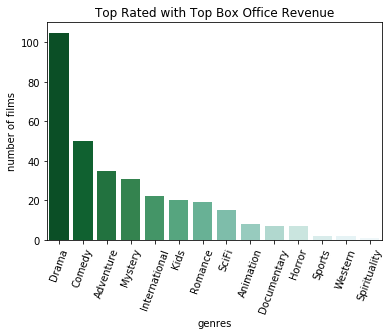

In [14]:
import operator

dfratetoprofit
cols = list(dfratetoprofit.columns)
genre_cols = cols[3:]
genre_count = {}
for col in genre_cols:
    count = np.sum(dfratetoprofit[col] != '0').sum() 
    genre_count[col] = count
    
#genre_count   
genre_count_clean = {k: v for k, v in genre_count.items() if v}
sorted_d = dict(sorted(genre_count_clean.items(), key=operator.itemgetter(1),reverse=True))
#sorted_d
keys = list(sorted_d.keys())
values = list(sorted_d.values())

ax = sns.barplot(y = values, x = keys, palette="BuGn_r")
ax.set_xticklabels(ax.get_xticklabels(), rotation=70)
ax.set(xlabel='genres', ylabel='number of films')
ax.set_title('Top Rated with Top Box Office Revenue')

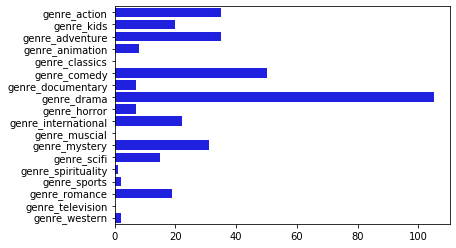

In [4]:
conn = sqlite3.connect('movie.db') 
cur = conn.cursor()

cur.execute(""" 
SELECT r.rating, box_office, genre_action, genre_kids, genre_adventure, genre_animation, genre_classics, 
genre_comedy, genre_documentary, genre_drama, 
genre_horror, genre_international, genre_kids, 
genre_muscial, genre_mystery, genre_scifi, 
genre_spirituality, genre_sports, genre_romance,
genre_television, genre_western
FROM rt_reviews r
LEFT JOIN rt_movie_info
USING('id')  
WHERE (box_office > 100000) & (r.rating == '4/4') OR (box_office > 10000) & 
(r.rating == 'A') OR (box_office > 10000) & (r.rating == '10') OR 
(box_office > 10000) & (r.rating == '5/5') 
GROUP BY id
ORDER BY box_office DESC;""")

dfgenre = pd.DataFrame(cur.fetchall())
dfgenre.columns = (x[0] for x in cur.description)
#print(dft.shape)
#print(dft.info())
#dft


#dfgBoxList = dfgBox.values.tolist()
cols = list(dfgenre.columns)
genre_cols = cols[2:]
genre_count = {}
for col in genre_cols:
    count = np.sum(dfgenre[col] != '0').sum() 
    genre_count[col] = count
    
genre_count   

keys = list(genre_count.keys())
values = list(genre_count.values())

sns.barplot(y = keys, x = values, color = 'blue')

### Popularity, Gross Profit and Net Revenue: are there any notable patterns?

***Movie Popularity metric in TMDB calculated by:***

* Number of votes for the day
* Number of views for the day
* Number of users who marked it as a "favourite" for the day
* Number of users who added it to their "watchlist" for the day
* Release date
* Number of total votes
* Previous days score

In [11]:
popularity = tmdb_mglb_df.sort_values(by=['popularity'], ascending=False) #sort by popularity
popularity25 = popularity[:25]#set new dataframe of top 25 most popular movies
popularity25.drop(['Unnamed: 0'], axis=1) #drop columns

,id,original_title,popularity,release_date_x,title,vote_average,vote_count,Fantasy,Drama,War,Mystery,Comedy,Romance,Family,Music,Documentary,Animation,Western,Action,Crime,Thriller,TV Movie,Adventure,History,Science Fiction,Horror,original_language,release_date_y,movie,production_budget,domestic_gross,worldwide_gross,domesticgross_v_production,total_net
23887,299536,Avengers: Infinity War,80.77,2018-04-27,Avengers: Infinity War,8.30,13948,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,English,"Apr 27, 2018",Avengers: Infinity War,300000000.00,678815482.00,2048134200.00,378815482.00,1748134200.00
11050,245891,John Wick,78.12,2014-10-24,John Wick,7.20,10081,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,English,"Oct 24, 2014",John Wick,30000000.00,43037835.00,76235001.00,13037835.00,46235001.00
23888,324857,Spider-Man: Into the Spider-Verse,60.53,2018-12-14,Spider-Man: Into the Spider-Verse,8.40,4048,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,English,NaN,NaN,nan,nan,nan,nan,nan
11051,122917,The Hobbit: The Battle of the Five Armies,53.78,2014-12-17,The Hobbit: The Battle of the Five Armies,7.30,8392,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,English,"Dec 17, 2014",The Hobbit: The Battle of the Five Armies,250000000.00,255119788.00,945577621.00,5119788.00,695577621.00
5196,24428,The Avengers,50.29,2012-05-04,The Avengers,7.60,19673,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,English,"May 4, 2012",The Avengers,225000000.00,623279547.00,1517935897.00,398279547.00,1292935897.00
5197,24428,The Avengers,50.29,2012-05-04,The Avengers,7.60,19673,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,English,"Aug 14, 1998",The Avengers,60000000.00,23385416.00,48585416.00,-36614584.00,-11414584.00
11052,118340,Guardians of the Galaxy,49.61,2014-08-01,Guardians of the Galaxy,7.90,17958,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,English,"Aug 1, 2014",Guardians of the Galaxy,170000000.00,333172112.00,770867516.00,163172112.00,600867516.00
20683,335984,Blade Runner 2049,48.57,2017-10-06,Blade Runner 2049,7.40,6679,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,English,"Oct 6, 2017",Blade Runner 2049,185000000.00,92054159.00,259357408.00,-92945841.00,74357408.00
23889,335984,Blade Runner 2049,48.57,2017-10-06,Blade Runner 2049,7.40,6679,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,English,"Oct 6, 2017",Blade Runner 2049,185000000.00,92054159.00,259357408.00,-92945841.00,74357408.00
23890,338952,Fantastic Beasts: The Crimes of Grindelwald,48.51,2018-11-16,Fantastic Beasts: The Crimes of Grindelwald,6.90,4870,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,English,"Nov 16, 2018",Fantastic Beasts: The Crimes of Grindelwald,200000000.00,159555901.00,652220086.00,-40444099.00,452220086.00


**Finding**: add conculsion here

## Data Visualizations 

line graph of what gross profit looks like considering popularity. (popularity is the Y axis and dollars is the X axis)

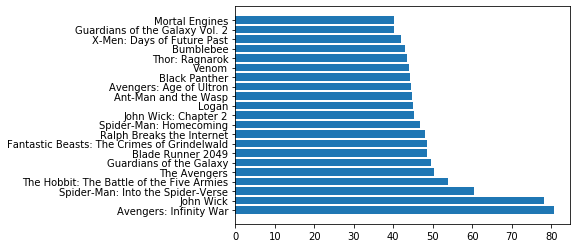

In [13]:
#setting plot variables 
mov = popularity25.loc[:, 'original_title']
pop = popularity25.loc[:, 'popularity']
gross = popularity25.loc[:, 'worldwide_gross']
net = popularity25.loc[:, 'total_net']

#plot movie vs. popularity rating
plt.barh(mov, pop)
plt.show()

In [24]:
#calculate median of top 25 popularity score
print('popularity score:',popularity25.loc[:, 'popularity'].median())

#calculate median of gross
print('median of gross: $',popularity25.loc[:,'worldwide_gross'].median())

#calculate median of net
print('median of net: $',popularity25.loc[:,'total_net'].median())

popularity score: 45.253
median of gross: $ 747862775.0
median of net: $ 547862775.0


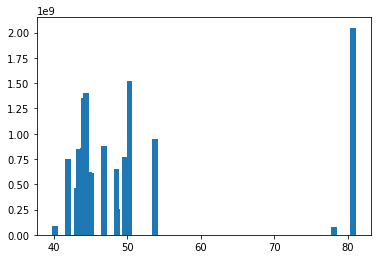

In [18]:
#popularity vs. gross
plt.bar(pop, gross)
plt.show()

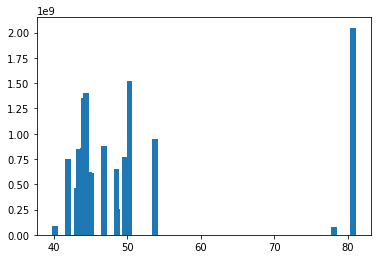

In [19]:
#popularity vs. gross

plt.bar(pop, gross)
plt.show()

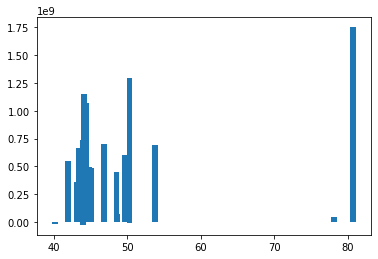

In [20]:
#popularity vs. net

plt.bar(pop, net)
plt.show()

Finding: Of the Top 25 movies with the highest popularity rating, an average rating of 44.383 correlated to a gross revenue of \\$652,220,086 and net profits of \\$493,144,660, respectively.